### CNN
Convolutional Neural Networks (CNNs) represent a specialized class of deep learning architectures meticulously crafted for the purpose of image recognition and computer vision tasks. By leveraging convolutional layers, these networks possess the capability to automatically identify and extract patterns and distinctive features within images. Subsequently, pooling layers are employed to decrease the spatial dimensions of the data, thereby mitigating the risk of overfitting, a common issue in deep learning models.


### Dataset 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

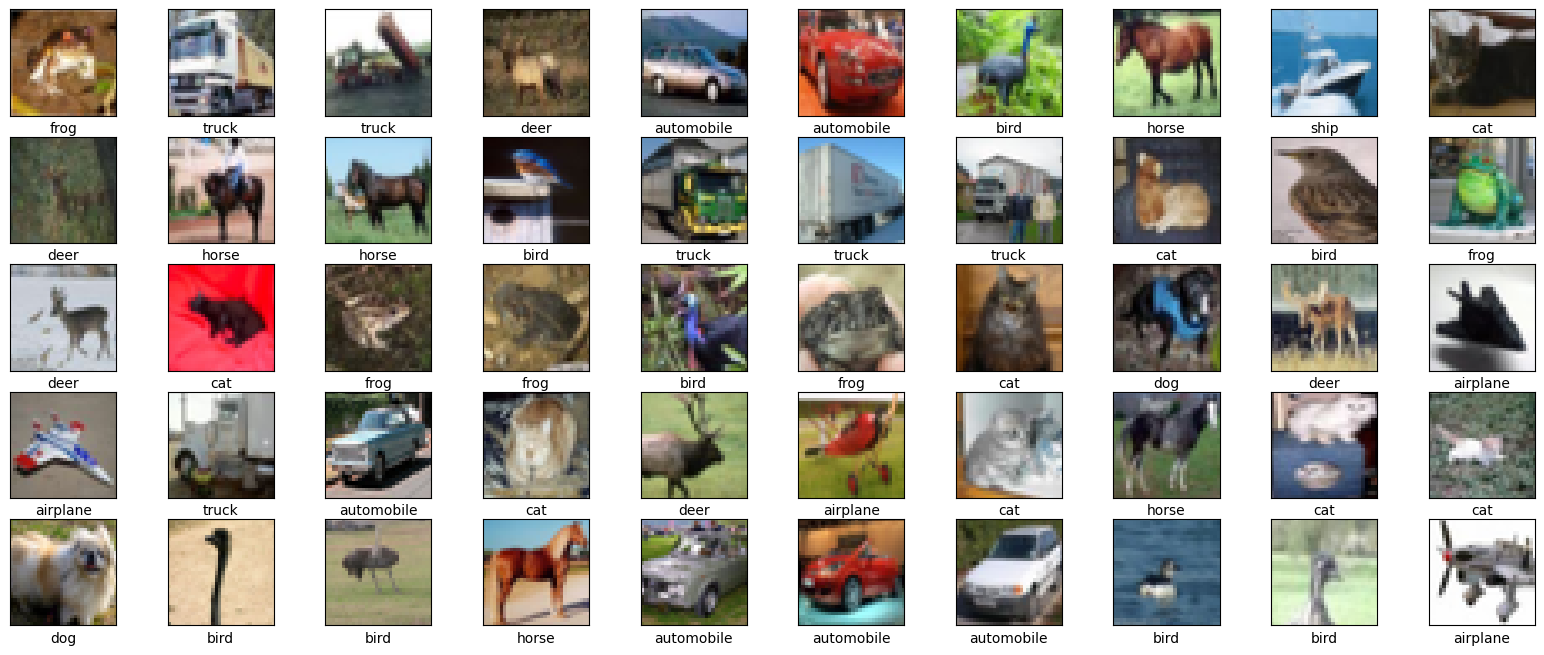

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0 

### Model

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

### Training 

In [9]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.6869 - accuracy: 0.3862 - val_loss: 1.6023 - val_accuracy: 0.4200
Epoch 2/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3121 - accuracy: 0.5313 - val_loss: 1.5094 - val_accuracy: 0.4580
Epoch 3/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1345 - accuracy: 0.6021 - val_loss: 1.1118 - val_accuracy: 0.6110
Epoch 4/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0107 - accuracy: 0.6475 - val_loss: 1.0685 - val_accuracy: 0.6243
Epoch 5/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9245 - accuracy: 0.6773 - val_loss: 0.9631 - val_accuracy: 0.6680
Epoch 6/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8519 - accuracy: 0.7033 - val_loss: 1.0344 - val_accuracy: 0.6434
Epoch 7/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7918 - accuracy: 0.7257 - val_loss: 1.0159 -

### Plotting

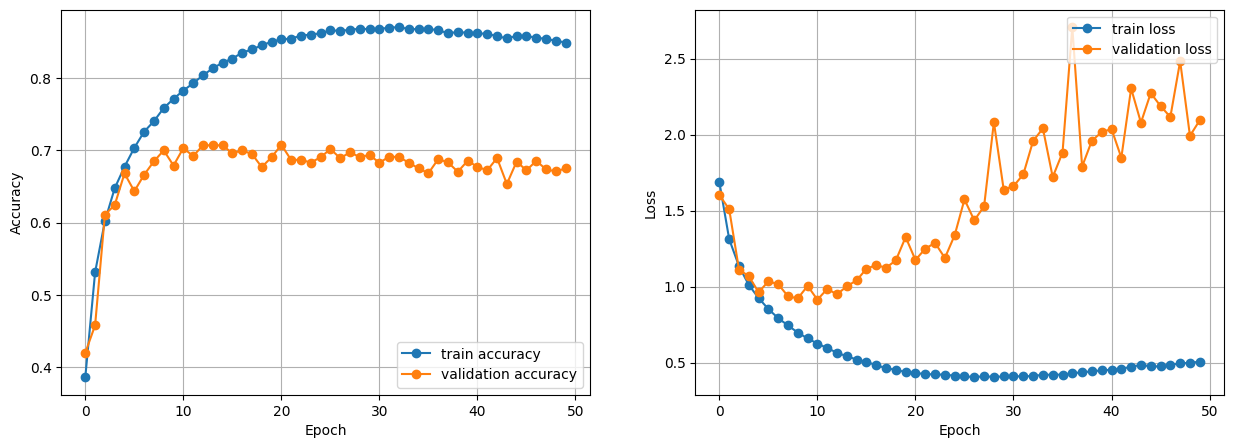

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')



plt.show()

### Stats

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 2.2223 - accuracy: 0.6671

Test Accuracy: 0.6671000123023987

Test Loss: 2.2223103046417236


In [12]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [13]:
predictions[0]

array([3.1386115e-02, 2.7736303e-18, 9.0241572e-04, 6.7818998e-03,
       4.3624004e-11, 9.6092951e-01, 8.4236111e-11, 2.2738309e-08,
       1.0225005e-11, 6.0266916e-14], dtype=float32)

In [14]:
np.argmax(predictions[0])

5

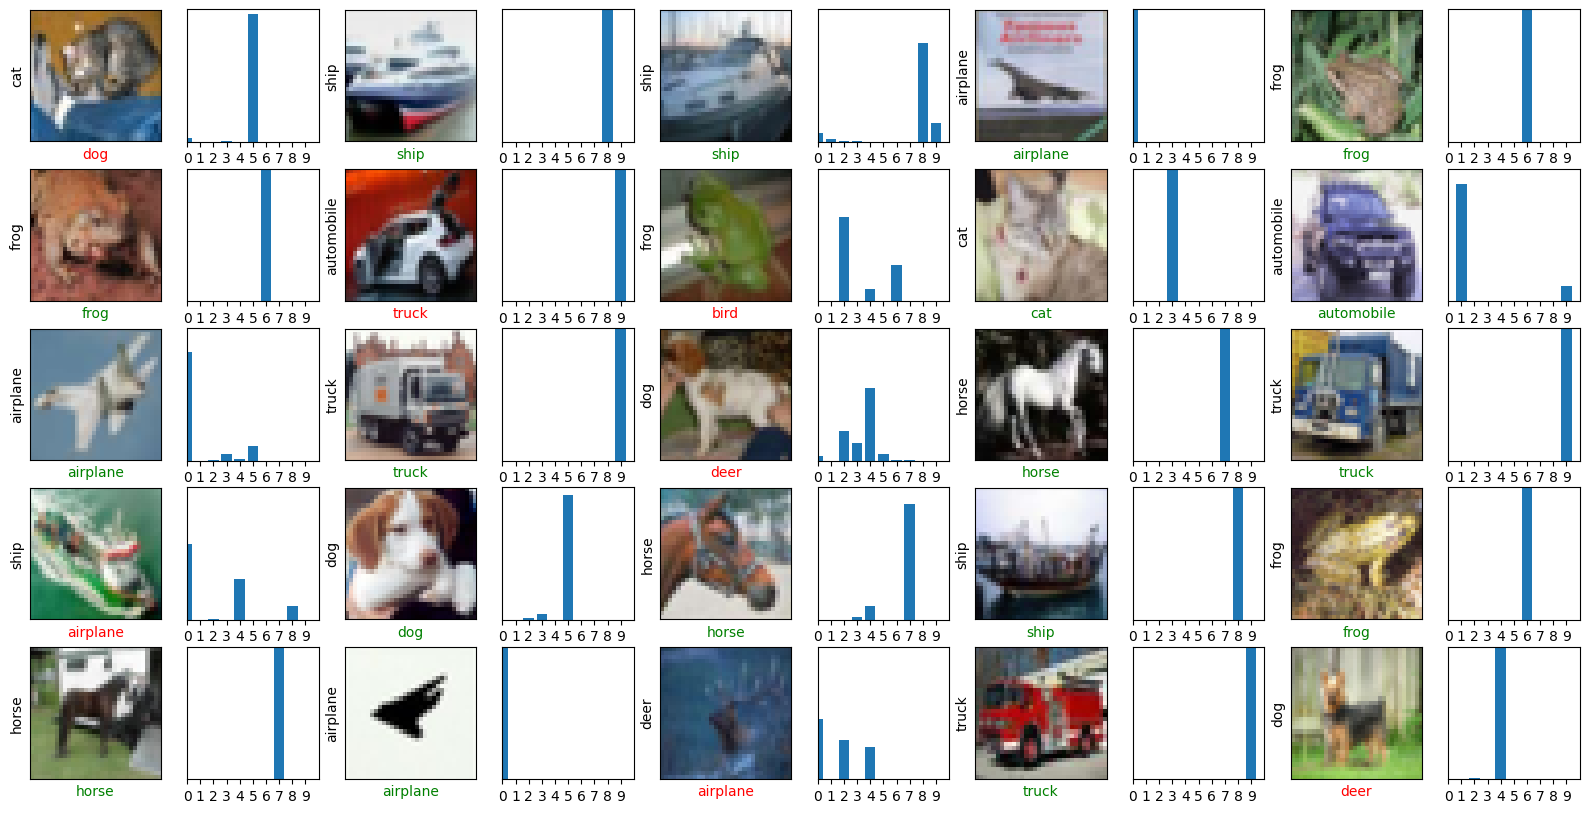

In [15]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

### CNN - Optimizer
An optimizer is an algorithm or method used in the field of machine learning and deep learning to optimize or improve the performance of a model during the training process. In the context of neural networks and deep learning, an optimizer is specifically designed to minimize the loss function of the model by adjusting the model's parameters iteratively. Different optimizers may have distinct strategies for updating the parameters, and some incorporate adaptive learning rates to handle the learning rate hyperparameter effectively. Popular optimizers, such as Stochastic Gradient Descent (SGD), Adam and RMSprop have been widely used and have shown significant improvements in training deep neural networks.


### RMSprop - Optimizer
RMSprop is an adaptive optimization algorithm that adjusts the learning rate for each parameter based on the square root of the exponential moving average of squared gradients

#### Parameters
Learning Rate: RMSprop uses an adaptive learning rate similar to Adam, adjusting it based on the historical gradients.
Learning Rate Schedule: It can use a fixed learning rate or incorporate learning rate decay.
Momentum: RMSprop doesn't have momentum, and it typically only keeps track of the exponential moving average of the squared gradients.
Weight Decay: As with Adam and SGD, RMSprop supports optional L2 regularization for weight decay.

In [7]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 21s 16ms/step - loss: 1.6988 - accuracy: 0.3795 - val_loss: 1.4260 - val_accuracy: 0.4937
Epoch 2/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3209 - accuracy: 0.5257 - val_loss: 1.2191 - val_accuracy: 0.5657
Epoch 3/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1552 - accuracy: 0.5925 - val_loss: 1.1544 - val_accuracy: 0.5938
Epoch 4/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0478 - accuracy: 0.6327 - val_loss: 1.1231 - val_accuracy: 0.6062
Epoch 5/50
1250/1250 [==============================] - 21s 17ms/step - loss: 0.9672 - accuracy: 0.6610 - val_loss: 1.0440 - val_accuracy: 0.6345
Epoch 6/50
1250/1250 [==============================] - 23s 19ms/step - loss: 0.8980 - accuracy: 0.6872 - val_loss: 1.0182 - val_accuracy: 0.6495
Epoch 7/50
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8447 - accuracy: 0.7059 - val_loss: 0.9452 -

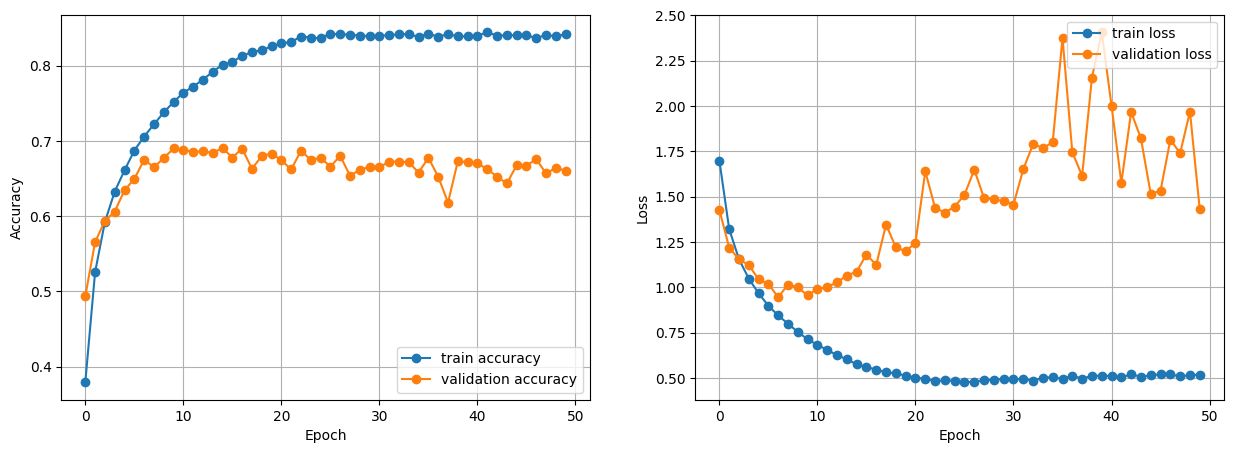

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 1.4771 - accuracy: 0.6504

Test Accuracy: 0.6503999829292297

Test Loss: 1.4770973920822144


### SGD - Optimizer
SGD is the most basic optimization algorithm. It updates the model parameters using the gradients of the loss function with respect to each parameter and a fixed learning rate.

#### Parameters
Learning Rate: SGD uses a fixed learning rate throughout training for all parameters.
Learning Rate Schedule: It doesn't have built-in adaptive learning rate schedules, but you can manually introduce learning rate decay over time.
Momentum: SGD supports momentum, where an additional parameter is introduced to control how much of the previous gradient direction is retained in the current update.
Weight Decay: Like Adam, SGD also allows optional L2 regularization for weight decay.

In [8]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 21s 17ms/step - loss: 2.1331 - accuracy: 0.2175 - val_loss: 1.9624 - val_accuracy: 0.2859
Epoch 2/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.8050 - accuracy: 0.3492 - val_loss: 1.6856 - val_accuracy: 0.3892
Epoch 3/50
1250/1250 [==============================] - 21s 16ms/step - loss: 1.5790 - accuracy: 0.4289 - val_loss: 1.7021 - val_accuracy: 0.3849
Epoch 4/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4588 - accuracy: 0.4701 - val_loss: 1.4382 - val_accuracy: 0.4802
Epoch 5/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.3718 - accuracy: 0.5083 - val_loss: 1.3573 - val_accuracy: 0.5177
Epoch 6/50
1250/1250 [==============================] - 22s 17ms/step - loss: 1.3059 - accuracy: 0.5337 - val_loss: 1.3718 - val_accuracy: 0.5191
Epoch 7/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2483 - accuracy: 0.5555 - val_loss: 1.2848 -

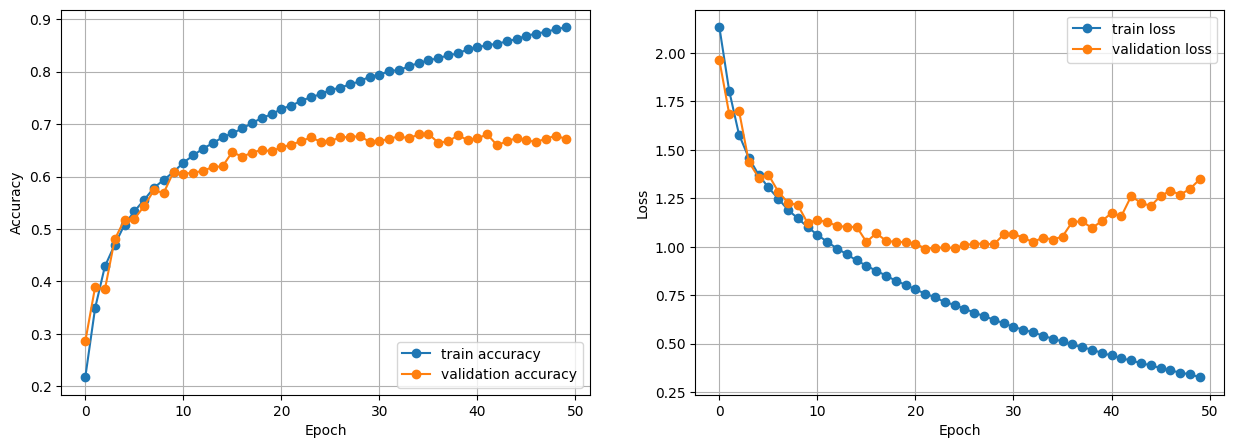

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 5ms/step - loss: 1.3198 - accuracy: 0.6718

Test Accuracy: 0.6718000173568726

Test Loss: 1.3198412656784058


### Adam - Optimizer
Adam is a popular optimization algorithm that combines the benefits of both RMSprop and momentum-based techniques. It adapts the learning rate for each parameter in real-time and uses exponential moving averages of the gradients to update the weights.

#### Parameters
Learning Rate: Adam uses an adaptive learning rate, which means it adjusts the learning rate for each parameter individually based on the historical gradients.
Learning Rate Schedule: It supports a time-based learning rate schedule or allows you to customize the schedule.
Momentum: Adam does not use traditional momentum like SGD, as it calculates adaptive learning rates using the first and second moments.
Weight Decay: Adam allows optional L2 regularization, which penalizes large parameter values to prevent overfitting.

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6031 - accuracy: 0.4116 - val_loss: 1.3754 - val_accuracy: 0.5061
Epoch 2/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.2573 - accuracy: 0.5487 - val_loss: 1.1772 - val_accuracy: 0.5823
Epoch 3/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.1226 - accuracy: 0.5997 - val_loss: 1.1013 - val_accuracy: 0.6154
Epoch 4/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.0229 - accuracy: 0.6361 - val_loss: 1.0603 - val_accuracy: 0.6323
Epoch 5/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.9504 - accuracy: 0.6640 - val_loss: 1.0197 - val_accuracy: 0.6468
Epoch 6/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8837 - accuracy: 0.6892 - val_loss: 0.9825 - val_accuracy: 0.6572
Epoch 7/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8291 - accuracy: 0.7070 - val_loss: 1.0173 -

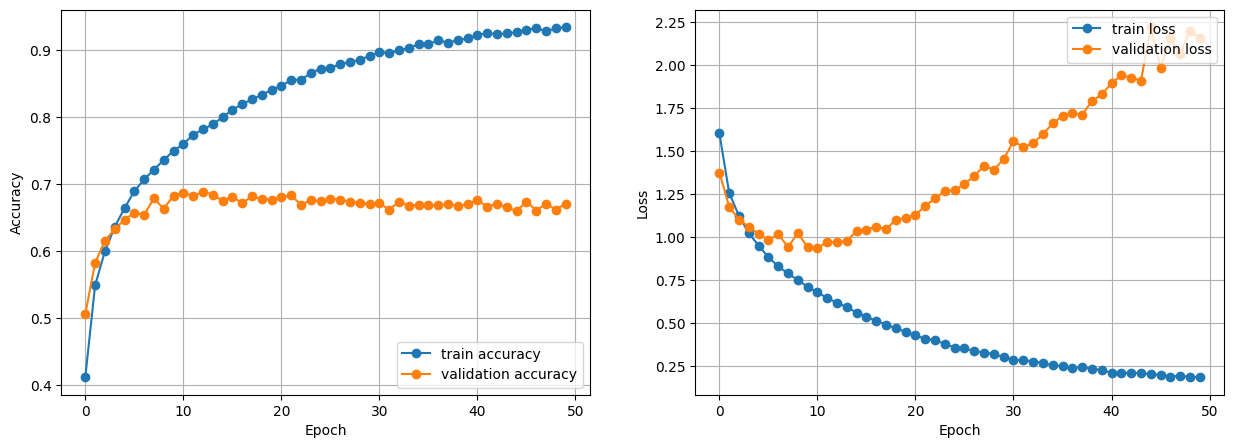

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 5ms/step - loss: 2.2287 - accuracy: 0.6591

Test Accuracy: 0.6590999960899353

Test Loss: 2.228731155395508


### CNN - Preprocessing
Normalizing data in Convolutional Neural Networks (CNNs) refers to the process of scaling the input data to have a common mean and standard deviation. This is an essential step in the data preprocessing pipeline for neural networks, including CNNs. The purpose of normalization is to bring the data into a range where the neural network can learn effectively and to avoid potential numerical issues during training. Over here we normalized by diving the input data by 255.

In [5]:
# X_train, X_test = X_train / 255.0, X_test / 255.0 || REMOVING NORMALIZATION from Model

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 21s 16ms/step - loss: 2.0330 - accuracy: 0.3372 - val_loss: 1.5662 - val_accuracy: 0.4360
Epoch 2/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5015 - accuracy: 0.4602 - val_loss: 1.4784 - val_accuracy: 0.4816
Epoch 3/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3831 - accuracy: 0.5077 - val_loss: 1.3870 - val_accuracy: 0.5085
Epoch 4/50
1250/1250 [==============================] - 20s 16ms/step - loss: 1.2908 - accuracy: 0.5424 - val_loss: 1.3762 - val_accuracy: 0.5272
Epoch 5/50
1250/1250 [==============================] - 19s 15ms/step - loss: 1.2159 - accuracy: 0.5705 - val_loss: 1.2084 - val_accuracy: 0.5817
Epoch 6/50
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1414 - accuracy: 0.5973 - val_loss: 1.1948 - val_accuracy: 0.5842
Epoch 7/50
1250/1250 [==============================] - 19s 15ms/step - loss: 1.0834 - accuracy: 0.6197 - val_loss: 1.2242 -

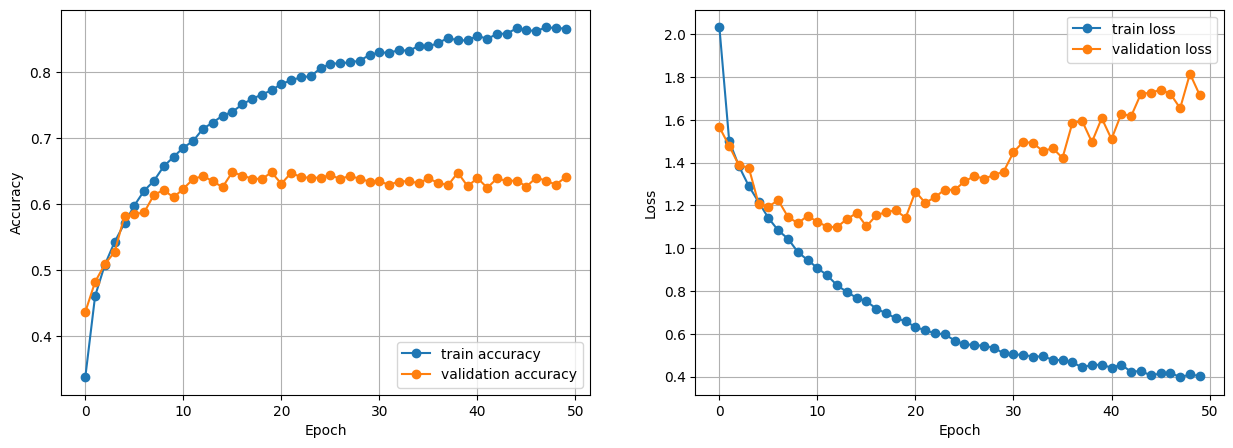

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 1.7789 - accuracy: 0.6269

Test Accuracy: 0.6269000172615051

Test Loss: 1.7788790464401245


### L1 Regularizer
L1 regularization, also known as Lasso regularization, is another technique used to prevent overfitting in machine learning models. Similar to L2 regularization, it adds a penalty term to the loss function, but instead of using the squared magnitude of weights, it uses the absolute magnitude (also known as the L1 norm) of the model's weights. 
The L1 regularization term is added to the original loss function, resulting in a modified loss function, which the model minimizes during trainingy:

In [2]:
l1_lambda = 0.01 # INSERTION OF REGULARIZER

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l1(l1_lambda)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_lambda)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(l1_lambda)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [9]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 20s 15ms/step - loss: 2.8449 - accuracy: 0.0988 - val_loss: 2.3735 - val_accuracy: 0.0952
Epoch 2/50
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3738 - accuracy: 0.0980 - val_loss: 2.3736 - val_accuracy: 0.0977
Epoch 3/50
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3738 - accuracy: 0.0985 - val_loss: 2.3742 - val_accuracy: 0.0980
Epoch 4/50
1250/1250 [==============================] - 17s 14ms/step - loss: 2.3738 - accuracy: 0.0997 - val_loss: 2.3740 - val_accuracy: 0.0952
Epoch 5/50
1250/1250 [==============================] - 17s 14ms/step - loss: 2.3738 - accuracy: 0.0989 - val_loss: 2.3734 - val_accuracy: 0.1014
Epoch 6/50
1250/1250 [==============================] - 18s 15ms/step - loss: 2.3738 - accuracy: 0.0987 - val_loss: 2.3735 - val_accuracy: 0.0952
Epoch 7/50
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3738 - accuracy: 0.0989 - val_loss: 2.3738 -

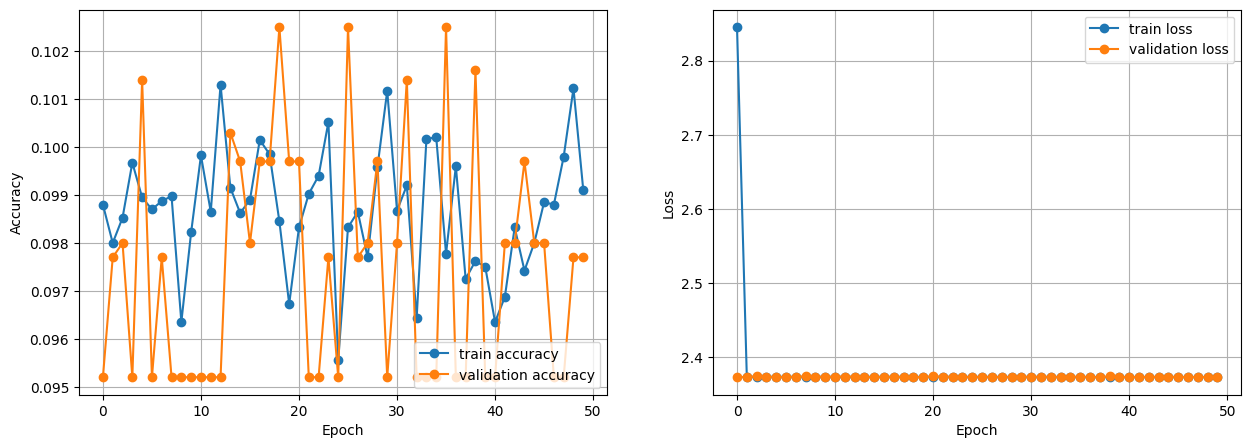

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### L2 Regularizer
L2 regularization, also known as Ridge regularization, is a technique used to prevent overfitting in machine learning models. It is a type of regularization that adds a penalty term to the loss function, encouraging the model to have smaller weights (parameters) in its neural network layers. The regularization term is proportional to the square of the magnitude of the model's weights. 
The L2 regularization term is added to the original loss function, resulting in a modified loss function, which the model minimizes during trainingy:

In [2]:
l2_lambda = 0.01 # INSERTION OF REGULARIZER

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [9]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
1250/1250 [==============================] - 22s 14ms/step - loss: 1.9928 - accuracy: 0.2955 - val_loss: 1.7663 - val_accuracy: 0.3953
Epoch 2/50
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6837 - accuracy: 0.4245 - val_loss: 1.6435 - val_accuracy: 0.4406
Epoch 3/50
1250/1250 [==============================] - 17s 13ms/step - loss: 1.5864 - accuracy: 0.4645 - val_loss: 1.5757 - val_accuracy: 0.4699
Epoch 4/50
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5267 - accuracy: 0.4926 - val_loss: 1.5182 - val_accuracy: 0.4901
Epoch 5/50
1250/1250 [==============================] - 17s 13ms/step - loss: 1.4837 - accuracy: 0.5118 - val_loss: 1.4482 - val_accuracy: 0.5228
Epoch 6/50
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4436 - accuracy: 0.5267 - val_loss: 1.4456 - val_accuracy: 0.5234
Epoch 7/50
1250/1250 [==============================] - 17s 13ms/step - loss: 1.4177 - accuracy: 0.5380 - val_loss: 1.4995 -

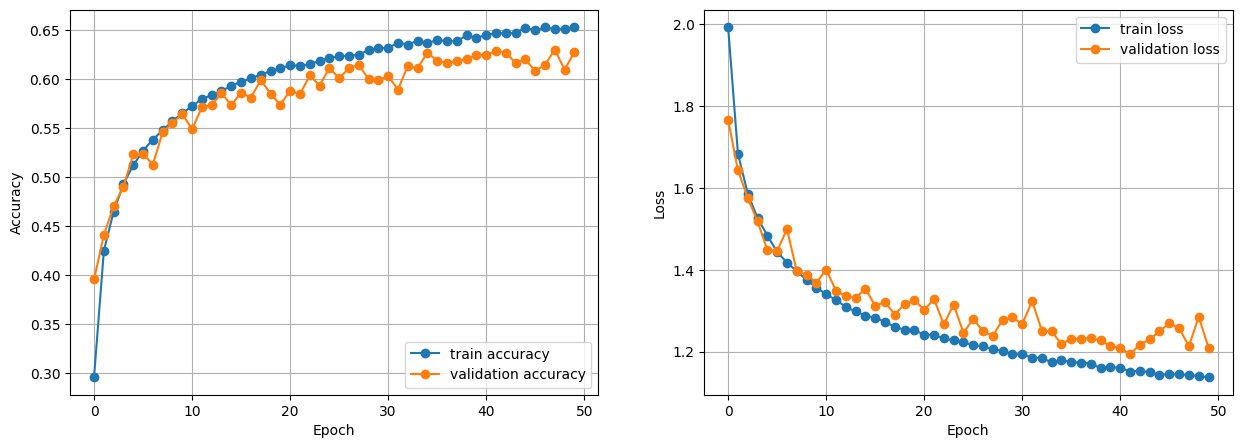

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()